The Hamiltonian of our system is
$$H(\phi,p,t) = \frac{p^2}{2} - \epsilon_1\cos{(\phi)} - \epsilon_2\cos{(r(\phi-\nu t))}.$$
The corresponding Hamilton equations of motions are
$$\dot{\phi} = \frac{\partial H}{\partial p} = p,$$
and
$$\dot{p} = -\frac{\partial H}{\partial \phi} = -\epsilon_1 \sin{(\phi)} - r\epsilon_2\sin{(r(\phi-\nu t))}.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [33]:
def wrapRad(theta):
    return (theta + np.pi) % (2*np.pi) - np.pi

def hamilton(y,t,e1,e2,r,nu):
    phi, p = y
    dydt = [p, -e1*np.sin(phi) - r*e2*np.sin(r*(phi-nu*t))]
    return dydt

def sep(phi,e1,e2,nu):
    sep1 = np.sqrt(1/2*(e1*(1+np.cos(phi)) + e2*(1+np.cos(phi))))
    return 2*sep1*np.sqrt(e1/(e1+e2)), 2*sep1*np.sqrt(e2/(e1+e2))+nu

# solve and plot
def phaseSpace(e1, e2, r, nu, ic):
    num = 201  # number of sampled time
    t = np.linspace(0,num-1,num)*2*np.pi/(r*nu)
    
    phi, p, phi_sep, p_sep = np.zeros((len(ic),num)), np.zeros((len(ic),num)), np.zeros((4,num)), np.zeros((4,num))
    for i, y0 in enumerate(ic):
        sol = odeint(hamilton, y0, t, args=(e1,e2,r,nu))
        phi[i] = [wrapRad(x) for x in sol[:,0]]
        p[i] = sol[:,1]
    
    # separatrix
    phi_sep = np.linspace(-np.pi, np.pi, 20)
    p_sep1, p_sep2 = sep(phi_sep, e1, e2, nu)
        
    return phi, p, phi_sep, p_sep1, -p_sep1, p_sep2, -p_sep2+2*nu

In [34]:
ic = [[x,y] for x in np.linspace(-np.pi, np.pi, 5) for y in np.linspace(-2, 7, 20)]

In [43]:
factor = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2])
Phi, P, Phi_sep, P_sep1p, P_sep1m, P_sep2p, P_sep2m = np.zeros((len(factor), 201*100)), np.zeros((len(factor), 201*100)), np.zeros((len(factor), 20)), np.zeros((len(factor), 20)), np.zeros((len(factor), 20)), np.zeros((len(factor), 20)), np.zeros((len(factor), 20))
for i, f in enumerate(factor):
    phi, p, phi_sep, p_sep1p, p_sep1m, p_sep2p, p_sep2m = phaseSpace(1-f, f, 1, 4, ic)
    Phi[i] = np.reshape(phi,(1,201*100))[0]
    P[i] = np.reshape(p,(1,201*100))[0]
    Phi_sep[i] = np.reshape(phi_sep,(1,20))[0]
    P_sep1p[i] = np.reshape(p_sep1p,(1,20))[0]
    P_sep1m[i] = np.reshape(p_sep1m,(1,20))[0]
    P_sep2p[i] = np.reshape(p_sep2p,(1,20))[0]
    P_sep2m[i] = np.reshape(p_sep2m,(1,20))[0]

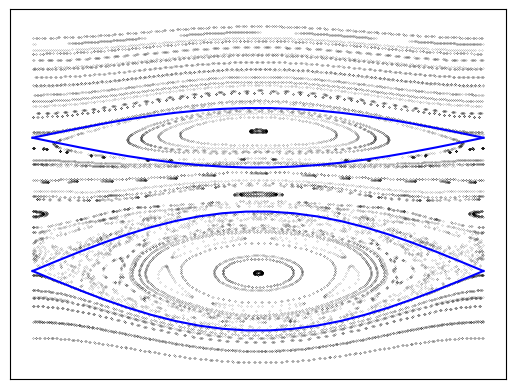

In [44]:
from matplotlib.animation import FuncAnimation, PillowWriter
fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    line, = ax.plot(Phi[i], P[i], 'k.', ms=0.2)
    line, = ax.plot(Phi_sep[i], P_sep1p[i], 'b')
    line, = ax.plot(Phi_sep[i], P_sep1m[i], 'b')
    line, = ax.plot(Phi_sep[i], P_sep2p[i], 'b')
    line, = ax.plot(Phi_sep[i], P_sep2m[i], 'b')
    
    plt.tick_params(left = False, right = False , labelleft = False ,
            labelbottom = False, bottom = False)
    
#     fac = np.linspace(1,5,num=10)
#     ax.set_title(f"epsilon2 = {0.2*fac[i]}")
    return line, 
        
ani = FuncAnimation(fig, animate, interval=1, blit=True, repeat=True, frames=len(factor))    
ani.save("breathing.gif", dpi=300, writer=PillowWriter(fps=1.5)) 